Notebook 1, Module 2, Statistical Inference for Data Science, CAS Applied Data Science, 2020-08-25, G. Conti, S. Haug, University of Bern. 


# 2. Descriptive statistics
# DEMONSTRATION

- Do descriptive statistics with the Iris dataset
- Make a model

First load the libraries / modules.

In [1]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache using fc-list. This may take a moment.


Load the dataset into a dataframe.

In [2]:
df = pd.read_csv('iris.csv',names=['slength','swidth','plength','pwidth','species'])
df.head() # Print the first five rows

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Browse through all rows.

In [3]:
#pd.set_option('display.max_rows', 200)
#df

Print some descriptive statistics.

In [4]:
df[df['species']=='Iris-setosa'].mean()

slength    5.006
swidth     3.418
plength    1.464
pwidth     0.244
dtype: float64

In [19]:
# to format the output
mean_pwidth = df[df['species'] == 'Iris-setosa'].mean()[3]
print("Mean of petal width = %3.2f"%mean_pwidth) # 3 digits, 2 digits after the dot and number should be a float

Mean of petal width = 0.24


In [20]:
# other way to format the output
round(df[df['species']=='Iris-setosa'].mean(),2)

slength    5.01
swidth     3.42
plength    1.46
pwidth     0.24
dtype: float64

In [5]:
df[df['species']=='Iris-setosa'].median()

slength    5.0
swidth     3.4
plength    1.5
pwidth     0.2
dtype: float64

What is the difference between the median and the mean?

In [6]:
df[df['species']=='Iris-setosa'].std()

slength    0.352490
swidth     0.381024
plength    0.173511
pwidth     0.107210
dtype: float64

What is the definition of the standard deviation?

Or get the summary.

In [7]:
df[df['species']=='Iris-setosa'].describe()

,slength,swidth,plength,pwidth
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Do all these digits after the dot make sense?

Calculate the sample variance.

In [8]:
df[df['species']=='Iris-setosa'].var()

slength    0.124249
swidth     0.145180
plength    0.030106
pwidth     0.011494
dtype: float64

What is the definition of the variance?

Calculate the skewness and the kurtosis. How are they defined?

In [9]:
df[df['species']=='Iris-setosa'].kurt()

slength   -0.252689
swidth     0.889251
plength    1.031626
pwidth     1.566442
dtype: float64

In [10]:
df[df['species']=='Iris-setosa'].skew()

slength    0.120087
swidth     0.107053
plength    0.071846
pwidth     1.197243
dtype: float64

Calculate and print correlation and covariance matrix. 

In [11]:
df[df['species']=='Iris-setosa'].cov()

,slength,swidth,plength,pwidth
slength,0.124249,0.100298,0.016139,0.010547
swidth,0.100298,0.145180,0.011682,0.011437
plength,0.016139,0.011682,0.030106,0.005698
pwidth,0.010547,0.011437,0.005698,0.011494


In [12]:
df[df['species']=='Iris-setosa'].corr()

,slength,swidth,plength,pwidth
slength,1.000000,0.746780,0.263874,0.279092
swidth,0.746780,1.000000,0.176695,0.279973
plength,0.263874,0.176695,1.000000,0.306308
pwidth,0.279092,0.279973,0.306308,1.000000


What is the definition of the correlation?

Study and comment the numbers in the correlation matrix.

Now we have done our descriptive statistics in numbers and tables. Now let us do it with plots. First the histograms.

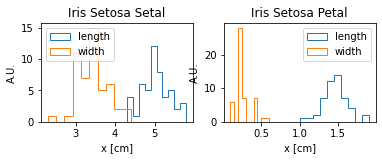

In [13]:
df_setosa = df[df['species']=='Iris-setosa']

plt.subplot(221)
df_setosa['slength'].plot(kind="hist",fill=False,histtype='step',title='Iris Setosa Setal', label="length")
ax_s = df_setosa['swidth'].plot(kind="hist",fill=False,histtype='step', label="width")
ax_s.set_xlabel('x [cm]')
ax_s.set_ylabel('A.U.')
plt.legend()

plt.subplot(222)
df_setosa['plength'].plot(kind="hist",fill=False,histtype='step',title='Iris Setosa Petal', label="length")
ax_s = df_setosa['pwidth'].plot(kind="hist",fill=False,histtype='step', label="width")
ax_s.set_xlabel('x [cm]')
ax_s.set_ylabel('A.U.')
plt.legend()

plt.show()

In [1]:
#$\sigma=\sqrt\frac{1}{n}\sum_{i=0}^{n}{(x_{i}-\bar{x})^2}$
# real-world (population std)
# divide by n-1 => if you don't know the real mean; correct that you use samples not the population 
# (divide by little bit smaller number)

Scatter plots.

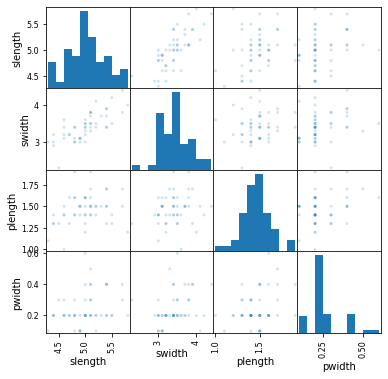

In [14]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html
from pandas.plotting import scatter_matrix
scatter_matrix(df[df['species']=='Iris-setosa'], alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()

Now we have studied our data with descriptive statistics. Before we can do the statistical inference, we want to make a model for our data. 

Let us start with the setal length of the Setosa species. It looks like a normal distribution so we choose that as a model. When we come to Hypothesis Testing, we will see how to test it mathematically. 

Our model will be a normal distribution with the mean and width taken from the dataset: **norm.pdf(x,mean,width)**. 

5.005999999999999 0.3524896872134512


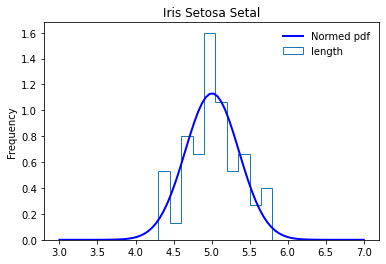

In [15]:
from scipy.stats import norm
mean  = df_setosa['slength'].mean()
width = df_setosa['slength'].std()
print(mean,width)
# Create figure and axis
fig, ax = plt.subplots(1,1)
# Create 100 x values and plot the normal pdf for these values
#x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
x = np.linspace(3,7,80)
ax.plot(x, norm.pdf(x,mean,width),'b-', lw=2, label='Normed pdf')
df_setosa['slength'].plot(kind="hist",fill=False,histtype='step',title='Iris Setosa Setal', label="length", density="True")
ax.legend(loc='best', frameon=False)
plt.show()

With our model we could now do a lot of inference. Taking a random leave, one could for example test how likely it is to be Iris Setosa.

More for you to practise in the afternoon notebook. Please also look at the implemented descriptive statistics methods in the Pandas and Stats modules.

## Summary

- We will summarize in class.
- ...

Descriptive statistics:
- pdf (model of our data)
- descriptive stats are defined on the pdf (moments)
- mean, variance (std), skew, kurtosis, standard error, covariance, correlation
- plots

Why descriptive statistics ?
- choose the correct model for our data
- ervery (?) data (column) is a random variable